<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/1_Basics/32_Exercise_Matplotlib_Basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise - Matplotlib Basics

## Topics Covered

This exercise goes over:

* Matplotlib horizontal bar chart
* Labeling

## Question

Graph the average salary (`salary_year_avg`) by `job_title_short` as a horizontal bar chart. Order it from the highest salary to the lowest. Include a title, and labels for the x & y-axis.


### Load Data

Load the data.

In [1]:
# Install datasets Library (if not already installed)
!pip install datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

### Get the Median Salary

We're going to get the median salary using `groupby()` to group by the job title then we'll use `median()` method.

Finally, we'll add sorting to our data (which we'll need when plotting).

#### Note: Median vs. Mean

We could have used the average for this, but based on my analysis it's best not.

Salaries often follow a skewed distribution where most employees earn on the lower end of the scale, and a few high earners pull the average (mean) up. In such cases, the mean does not accurately reflect the earnings of the majority.

TLDR: Use median for salary analysis.

In [2]:
# Get the average salary by job title
job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values()
job_salary

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Software Engineer,99150.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Data Engineer,125000.0
Data Scientist,127500.0
Senior Data Engineer,147500.0


### Plot the Chart

Plot the horizontal bar chart.

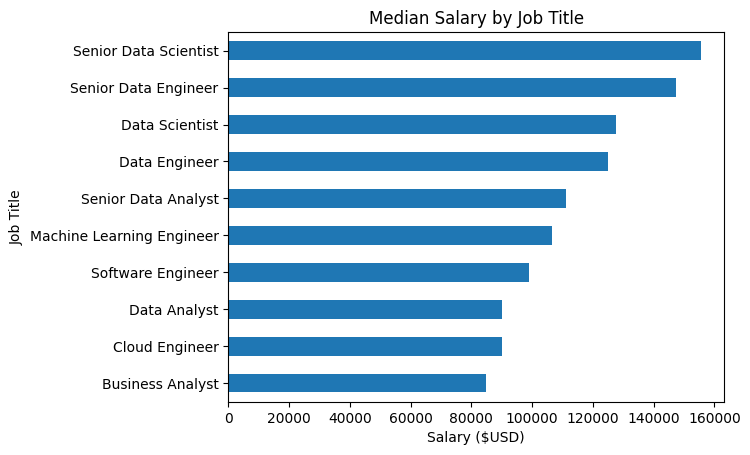

In [3]:
# Plot the chart
job_salary.plot(kind='barh')

# Customize the chart
plt.xlabel('Salary ($USD)')
plt.ylabel('Job Title')
plt.title('Median Salary by Job Title')

# Show the bar chart
plt.show()